<div align="center">
  <b> <font size="6">Multiple (Multi-variate) Linear Regression</font> </b>
</div>

In [53]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [54]:
# Load the dataset into pandas dataframe
df=pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Advertising.csv")    
# Change this location based on the location of dataset in your machine

In [55]:
# Display the first five records
df.head()    

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target variable </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent/target variable </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X1), Radio budget (X2), Newspaper budget (X3) as input and sales (Y) as output.

In [56]:
# Dataset shape (number of rows and columns)
df.shape

(200, 4)

<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension

### Step 2: Apply EDA

##### Univariate analysis

In [57]:
# Statistics summary
df["TV"].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [58]:
df["radio"].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

In [59]:
df["newspaper"].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

<AxesSubplot:>

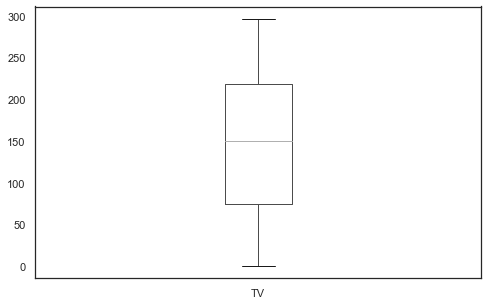

In [60]:
# Univariate Analysis using Boxplot
sns.set_style(style='white') 
df.boxplot(column =['TV'], grid = False,figsize=(8,5))   

<AxesSubplot:>

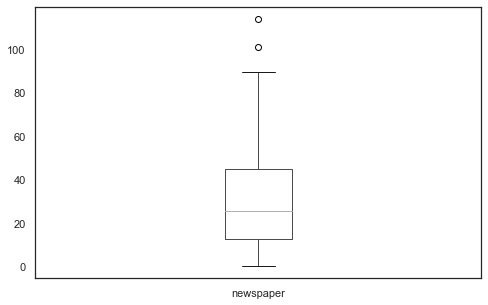

In [61]:
df.boxplot(column =['newspaper'], grid = False,figsize=(8,5))   

<AxesSubplot:>

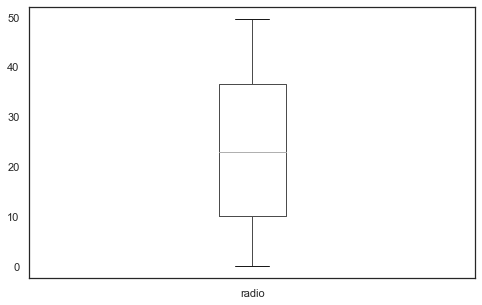

In [62]:
df.boxplot(column =['radio'], grid = False,figsize=(8,5))

<AxesSubplot:>

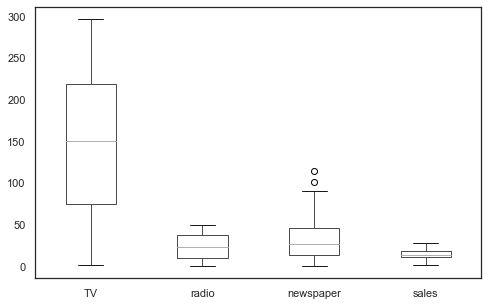

In [63]:
df.boxplot(grid = False,figsize=(8,5))

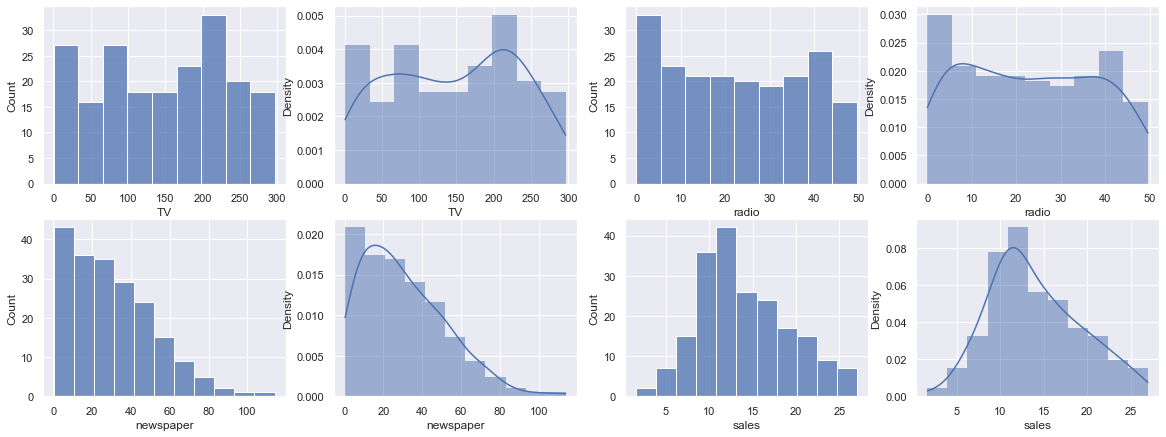

In [64]:
# Distribution plot to find skewness
from pylab import *
sns.set(rc={"figure.figsize": (20, 15)});  

subplot(4,4,1)
ax = sns.histplot(df["TV"])

subplot(4,4,2)
ax = sns.histplot(df["TV"], kde=True, stat="density", linewidth=0)

subplot(4,4,3)
ax = sns.histplot(df["radio"])

subplot(4,4,4)
ax = sns.histplot(df["radio"], kde=True, stat="density", linewidth=0)

subplot(4,4,5)
ax = sns.histplot(df["newspaper"])

subplot(4,4,6)
ax = sns.histplot(df["newspaper"], kde=True, stat="density", linewidth=0)

subplot(4,4,7)
ax = sns.histplot(df["sales"])

subplot(4,4,8)
ax = sns.histplot(df["sales"], kde=True, stat="density", linewidth=0)

plt.show()

##### Bivariate analysis

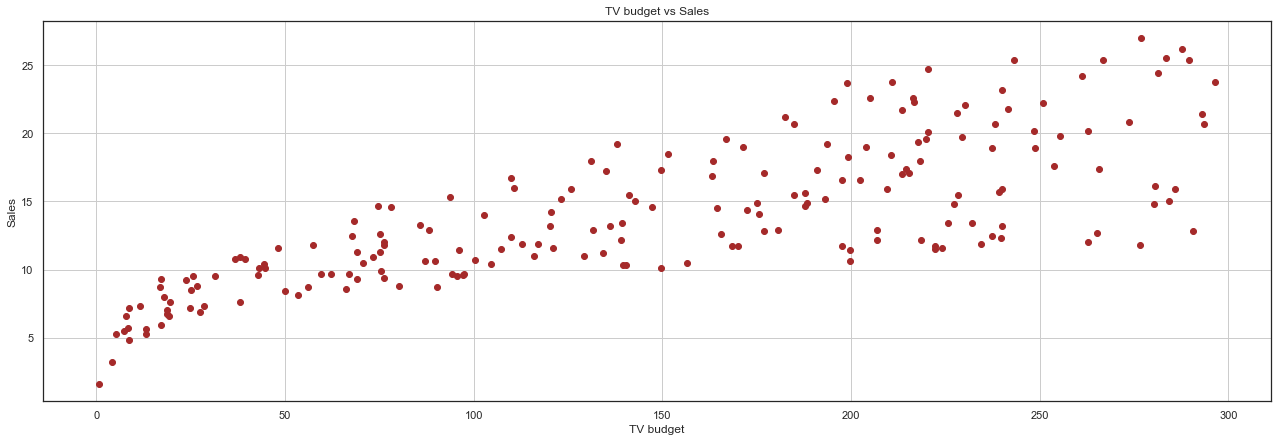

In [65]:
# Scatter plot
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(df["TV"],df["sales"],color="brown")
plt.grid(b=None)
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.show()

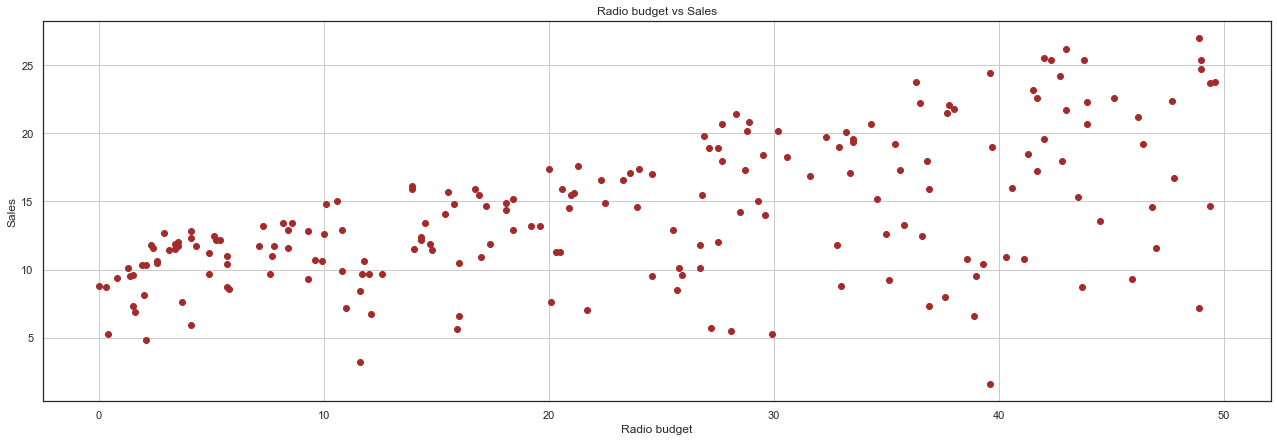

In [66]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(df["radio"],df["sales"],color="brown")
plt.grid(b=None)
plt.xlabel("Radio budget")
plt.ylabel("Sales")
plt.title("Radio budget vs Sales")
plt.show()

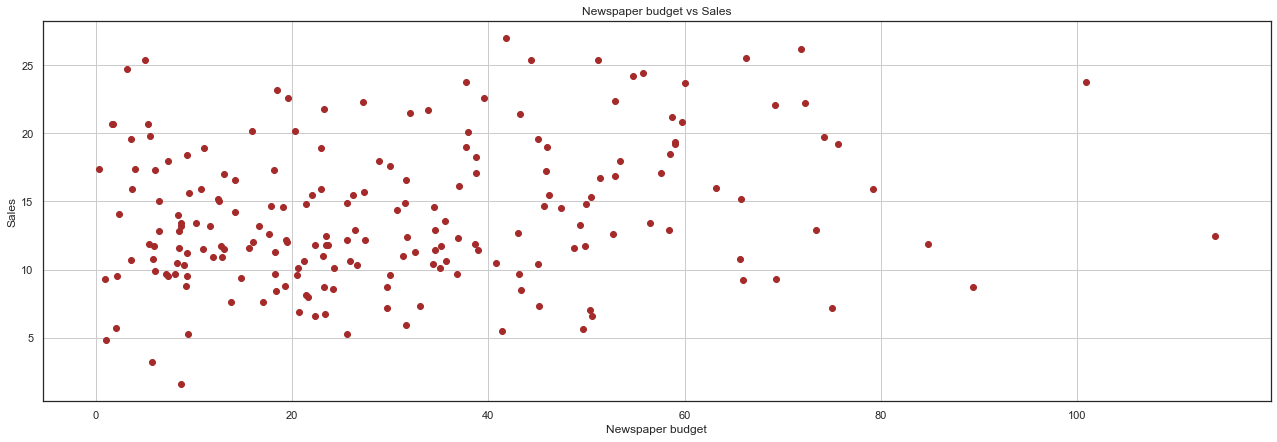

In [67]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(df["newspaper"],df["sales"],color="brown")
plt.grid(b=None)
plt.xlabel("Newspaper budget")
plt.ylabel("Sales")
plt.title("Newspaper budget vs Sales")
plt.show()

In [68]:
# Correlation
df.corr()
# Spearman's rho
# df.corr(method='spearman')    
# Kendall's tau
# df.corr(method='kendall')   

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Step 3. Pre-process and extract the features

In [69]:
# Load TV, and radio, and newspaper X1, X2, X3 as feature vector and sales into Y variable
X = df.iloc[:,0:3].values    # TV, radio, newspaper
Y = df.iloc[:,3].values      # Sales

In [70]:
X[:10,:]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2]])

In [71]:
Y[:10]

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6])

<b> input feature </b> independent feature or predictor feature. Here, X1 (TV), X2 (Radio), X3 (Newspaper) are the input features. <br>
<b> output feature </b>  dependent feature or response feature or target feature. Here, Y (sales) is the output feature.

### Step 4. Split the data for training and testing

In [72]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [73]:
x_train[:5,:]

array([[ 36.9,  38.6,  65.6],
       [ 31.5,  24.6,   2.2],
       [142.9,  29.3,  12.6],
       [209.6,  20.6,  10.7],
       [215.4,  23.6,  57.6]])

In [74]:
x_test[:5,:]

array([[ 69.2,  20.5,  18.3],
       [ 50. ,  11.6,  18.4],
       [ 90.4,   0.3,  23.2],
       [289.7,  42.3,  51.2],
       [170.2,   7.8,  35.2]])

In [75]:
y_train[:5]

array([10.8,  9.5, 15. , 15.9, 17.1])

In [76]:
y_test[:5]

array([11.3,  8.4,  8.7, 25.4, 11.7])

### Step 5: Training phase (bulding the model)

In [77]:
# Fitting line on multiple dimensions on the training set
from sklearn import linear_model
model = linear_model.LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [78]:
m1, m2, m3 = model.coef_

In [79]:
b = model.intercept_

In [80]:
print("The multi-linear model is :")
print('\t\t\t\t Y = m1 X1 + m2 X2 + m3 X3 + b \n')
print('\t\t\t\t Y = ',round(m1,3),'X1 + ',round(m2,3),'X2 + ',round(m3,3),'X3 + ',round(b,3))

The multi-linear model is :
				 Y = m1 X1 + m2 X2 + m3 X3 + b 

				 Y =  0.045 X1 +  0.196 X2 +  -0.003 X3 +  2.995


In [81]:
# Predicting the output for training input
y_train_pred = model.predict(x_train)

##### Visualizing the model

It involves 4 dimensions, so imagine yourself

##### Plotting observed sale (x) and predicted sale (y) for training set

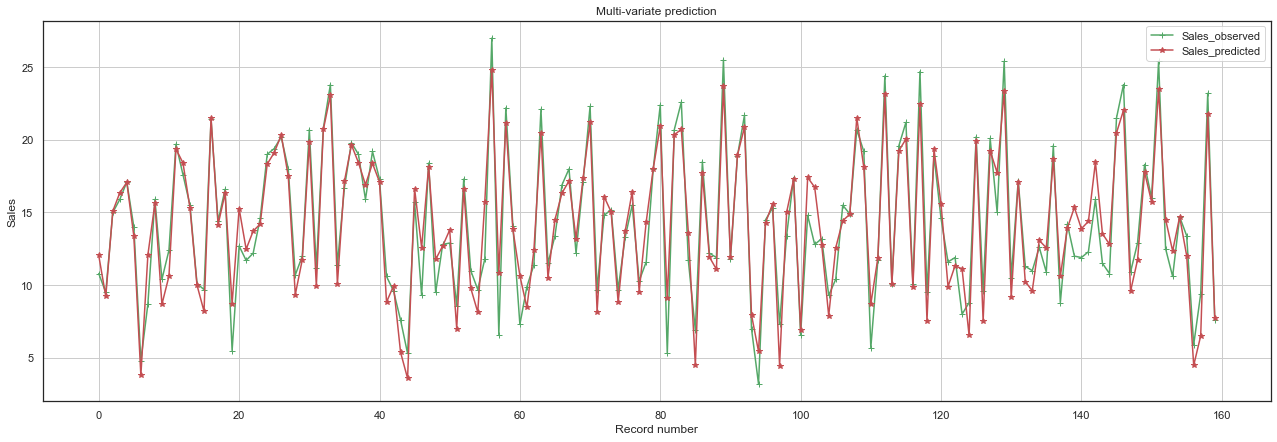

In [82]:
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_train,"g-+",label="Sales_observed")
plt.plot(x,y_train_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("Record number")
plt.ylabel("Sales")
plt.title("Multi-variate prediction")
plt.legend()
plt.show()

#### Residual (Error) plot 

If the model has done good predictions, then the datapoints must be near around to horizontal line.

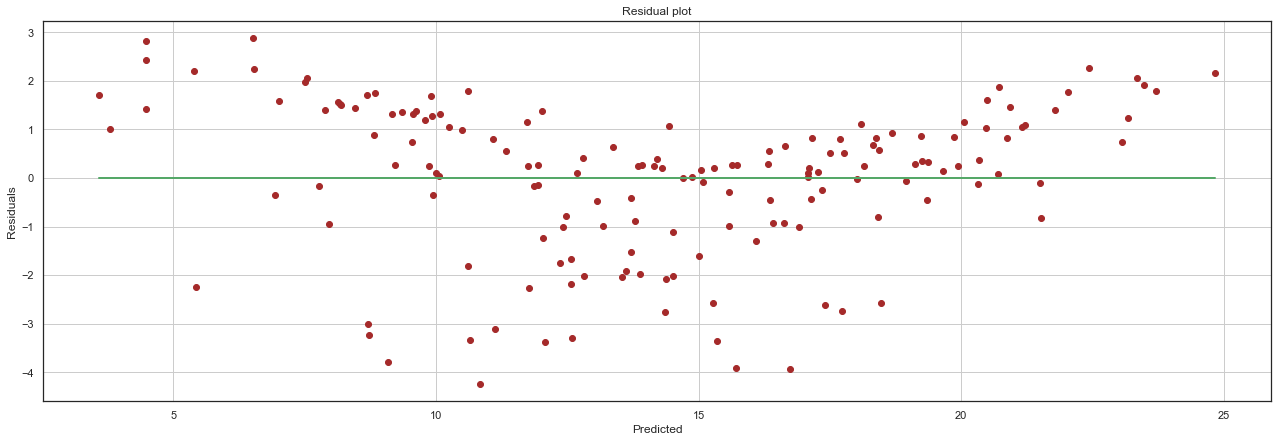

In [83]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [84]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 385.09


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [85]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 2.41


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [86]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 1.55


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [87]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 1.21


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [88]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = (y_train[i] - y_train_pred[i])/y_train[i]
  sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 11.43


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [89]:
from sklearn.metrics import r2_score
out = r2_score(y_train,y_train_pred)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 91.0 %


### Calculating Adjusted R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- (1-R^{2})\frac{(n-1)}{n-p-1} 
\end{equation}

In [90]:
out = 1 - (1-Train_RS)*(len(y_train)-1)/(len(y_train)-X.shape[1]-1)
Train_Adj_RS = round(out,2) 
print("Adjusted R-Squred value (goodness of model) for training set :",Train_Adj_RS,"%")  

Adjusted R-Squred value (goodness of model) for training set : 92.73 %


### Step 6: Testing phase

In [91]:
# Predicting values for test input set
y_test_pred = model.predict(x_test)

##### Visualizing the model

It involves 4 dimensions, so imagine yourself

##### Plotting observed sale (x) and predicted sale (y) for test set

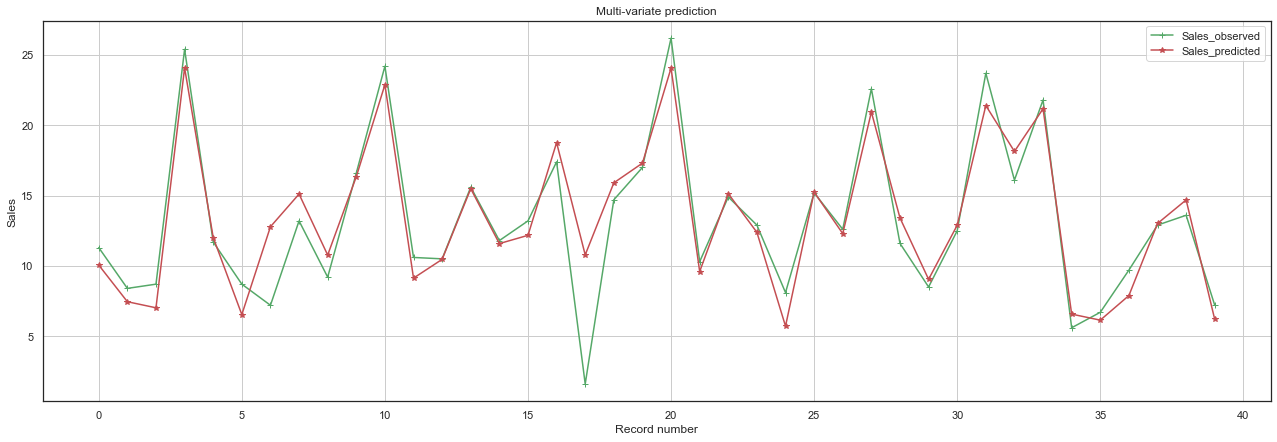

In [92]:
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Sales_observed")
plt.plot(x,y_test_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("Record number")
plt.ylabel("Sales")
plt.title("Multi-variate prediction")
plt.legend()
plt.show() 

#### Residual (Error) plot

If the model has done good predictions, then the datapoints must be near around to horizontal line.

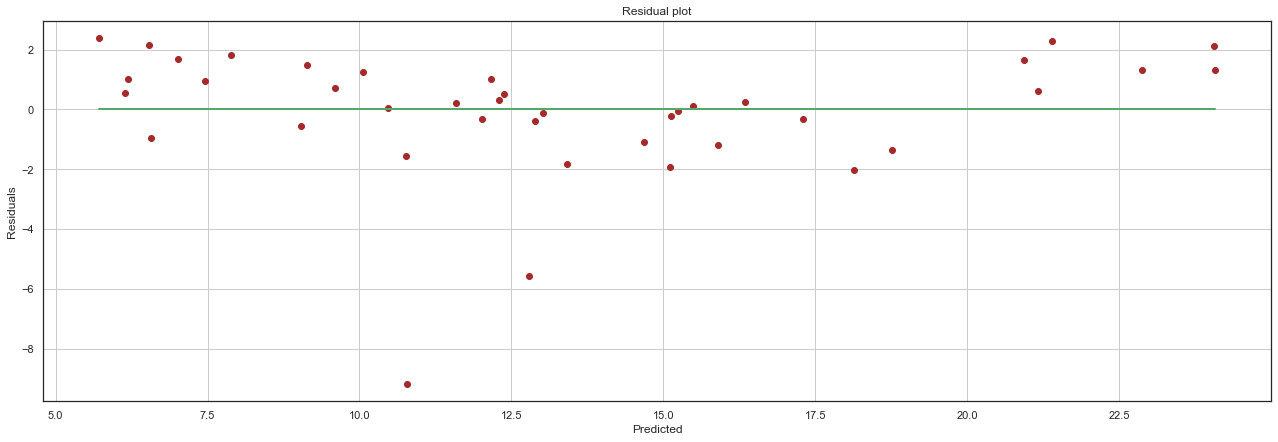

In [93]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test-y_test_pred
zeros = y_test-y_test
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

#### Storing the outcome in a file

In [94]:
# Store the predicted value for sales in new column
df.rename(columns={'sales': 'observed_sales'}, inplace=True)
sales_data = df.iloc[:,0:3]
predicted_values = model.predict(sales_data)
df['predicted_sales'] = predicted_values
df.head()

,TV,radio,newspaper,observed_sales,predicted_sales
0,230.1,37.8,69.2,22.1,20.488787
1,44.5,39.3,45.1,10.4,12.575771
2,17.2,45.9,69.3,9.3,12.588197
3,151.5,41.3,58.5,18.5,17.701984
4,180.8,10.8,58.4,12.9,13.015414


In [95]:
# Write the above output input into new csv
# df.to_csv("Multi Linear Regression Output.csv") 

### Different error calculations to asses the model

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [96]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 176.08


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [97]:
Test_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 9.63


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [98]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 3.1


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [99]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 1.36


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [100]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = (y_test[i] - y_test_pred[i])/y_test[i]
  sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 24.61


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [101]:
from sklearn.metrics import r2_score
out = r2_score(y_test,y_test_pred)
Test_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 86.0 %


### Calculating Adjusted R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- (1-R^{2})\frac{(n-1)}{n-p-1} 
\end{equation}

In [102]:
out = 1 - (1-Test_RS)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
Test_Adj_RS = round(out,2) 
print("Adjusted R-Squred value (goodness of model) for testing set :",Train_Adj_RS,"%")  

Adjusted R-Squred value (goodness of model) for testing set : 92.73 %


### Underfitting and overfitting observation

In [103]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)
print("ARS   \t\t",Train_Adj_RS,"\t\t\t", Test_Adj_RS)

Error 	 From training phase       From testing phase 
SSE   		 385.09 		 176.08
MSE   		 2.41 			 9.63
RMSE   		 1.55 			 3.1
MAE   		 1.21 			 1.36
RS   		 91.0 			 86.0
ARS   		 92.73 			 93.08
